In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv").sample(1000)

In [3]:
test_df = pd.read_csv("test.csv").sample(1000)


In [4]:
train_df.drop("Id", axis=1, inplace=True)
test_df.drop("Id", axis=1, inplace=True)

In [5]:
#Data Preprocessing: is target imbalanced?

In [6]:
y = train_df['Cover_Type']
#Values of y
print(f'In y there are {y.value_counts().sum()}')

In y there are 1000


In [7]:
train_df['Cover_Type']

312231     1
2512521    2
3252874    1
1049293    1
3344990    3
          ..
1139416    1
161830     2
975605     1
724179     2
1806588    2
Name: Cover_Type, Length: 1000, dtype: int64

Elements in target columns are divided as follow:
2    579
1    351
3     52
7     15
6      3
Name: Cover_Type, dtype: int64
Instead in percentile elements in target columns are divided as follow:
2    0.579
1    0.351
3    0.052
7    0.015
6    0.003
Name: Cover_Type, dtype: float64
AxesSubplot(0.260833,0.125;0.503333x0.755)


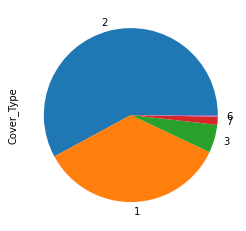

In [8]:
#which is my target? It's called Cover_type column
print(f"Elements in target columns are divided as follow:\n{y.value_counts(sort=True)}")
print(f"Instead in percentile elements in target columns are divided as follow:\n{y.value_counts(normalize=True,sort=True)}")
#Target column is balanced
print(y.value_counts(normalize=True).plot.pie())

As I see in the pie chart y values 3,4,5,6,7 are very small.
On 4.000.000 values 3+4+5+6+7(267.077 values) are equal to 6,67%
So I'd probably drop all the values  mentioned above

In [9]:
#Redefine Y. How?
#One hot encoder; Then take  first column: all 0  values are probably equal to 2 in y --> target = pd.get_dummies(y)[1]
#I don't have this problem with DecisionTree
y.head()


312231     1
2512521    2
3252874    1
1049293    1
3344990    3
Name: Cover_Type, dtype: int64

In [10]:
#Analysis of Dataframe

In [11]:
#Missing values
train_df.isnull().sum().sum()

0

In [12]:
train_df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [13]:
features = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
    'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
    'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
    'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
    'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
    'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
    'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
    'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']


In [14]:
soil_features = [x for x in features if x.startswith("Soil_Type")]
train_df["soil_type_count"] = train_df[soil_features].sum(axis=1)


wilderness_features = [x for x in features if x.startswith("Wilderness_Area")]
train_df["wilderness_area_count"] = train_df[wilderness_features].sum(axis=1)

train_df=  train_df.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
             'Wilderness_Area4','Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
             'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12','Soil_Type13', 'Soil_Type14','Soil_Type15',  'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
             'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
             'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
             'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
             'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'], axis = 1)

In [15]:
new_feature = train_df.columns.tolist()

What does these features mean? Values are generated by CNN.

In [16]:
train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,soil_type_count,wilderness_area_count
312231,3295,286,1,74,44,4213,142,250,167,1450,1,1,1
2512521,2833,52,37,58,39,663,173,199,222,1168,2,0,1
3252874,3455,61,13,363,57,252,202,237,172,493,1,1,1
1049293,3162,5,9,339,4,741,192,242,129,399,1,1,1
3344990,2604,17,41,48,5,599,161,219,130,770,3,0,1


In [17]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Elevation,1000.0,2976.632,277.331306,1959.0,2761.75,2970.0,3197.25,4096.0
Aspect,1000.0,150.711,111.193631,-13.0,56.00,122.0,241.25,388.0
Slope,1000.0,15.338,8.439489,-1.0,9.00,14.0,20.25,48.0
Horizontal_Distance_To_Hydrology,1000.0,269.775,231.941202,-40.0,110.75,202.0,350.00,1368.0
Vertical_Distance_To_Hydrology,1000.0,52.628,66.443528,-204.0,5.00,34.0,78.25,416.0
Horizontal_Distance_To_Roadways,1000.0,1724.957,1311.589943,-205.0,743.75,1433.0,2324.00,7067.0
Hillshade_9am,1000.0,212.566,30.863801,89.0,198.75,220.0,235.00,259.0
Hillshade_Noon,1000.0,221.348,22.041250,112.0,210.00,224.0,237.00,260.0
Hillshade_3pm,1000.0,140.254,43.474447,0.0,115.75,141.0,167.00,254.0
Horizontal_Distance_To_Fire_Points,1000.0,1572.424,1100.818241,-106.0,788.75,1365.5,2026.00,6866.0


All variables are quantitative:
Discrete one are: Cover_Type, Aspect, Slope, soil_type_count, wilderness_area_count
Variables containing values not allowed:
Aspect has values range [0°,360°]: so it doesn't allowed negative values and values greater than 360
Distances can't have negatives values; I will solve this issue changing them in Manhattan distances
Hillshade is measured within this interval [0°,255°]: so it doesn't allowed negative values and values greater than 255

Consider that dataset is generated by GANs, this kaggle discussion (https://www.kaggle.com/c/tabular-playground-series-dec-2021/discussion/293612) has determined that Transforming data in such a way that it responds to real constraints increases prediction accuracy

<AxesSubplot:>

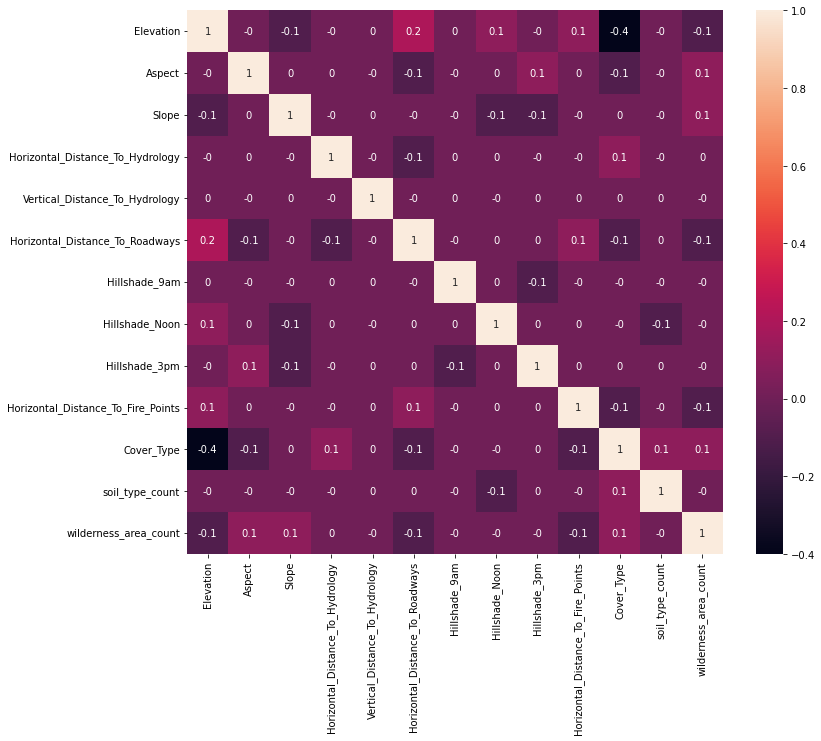

In [18]:
#Correlation
plt.figure(figsize=(12, 10))
data_corr = round(train_df[new_feature ].corr(),1)
sns.heatmap(data_corr, annot = True)

As heatmap can show us there is no correlation between the variables

In [19]:
#Check variance

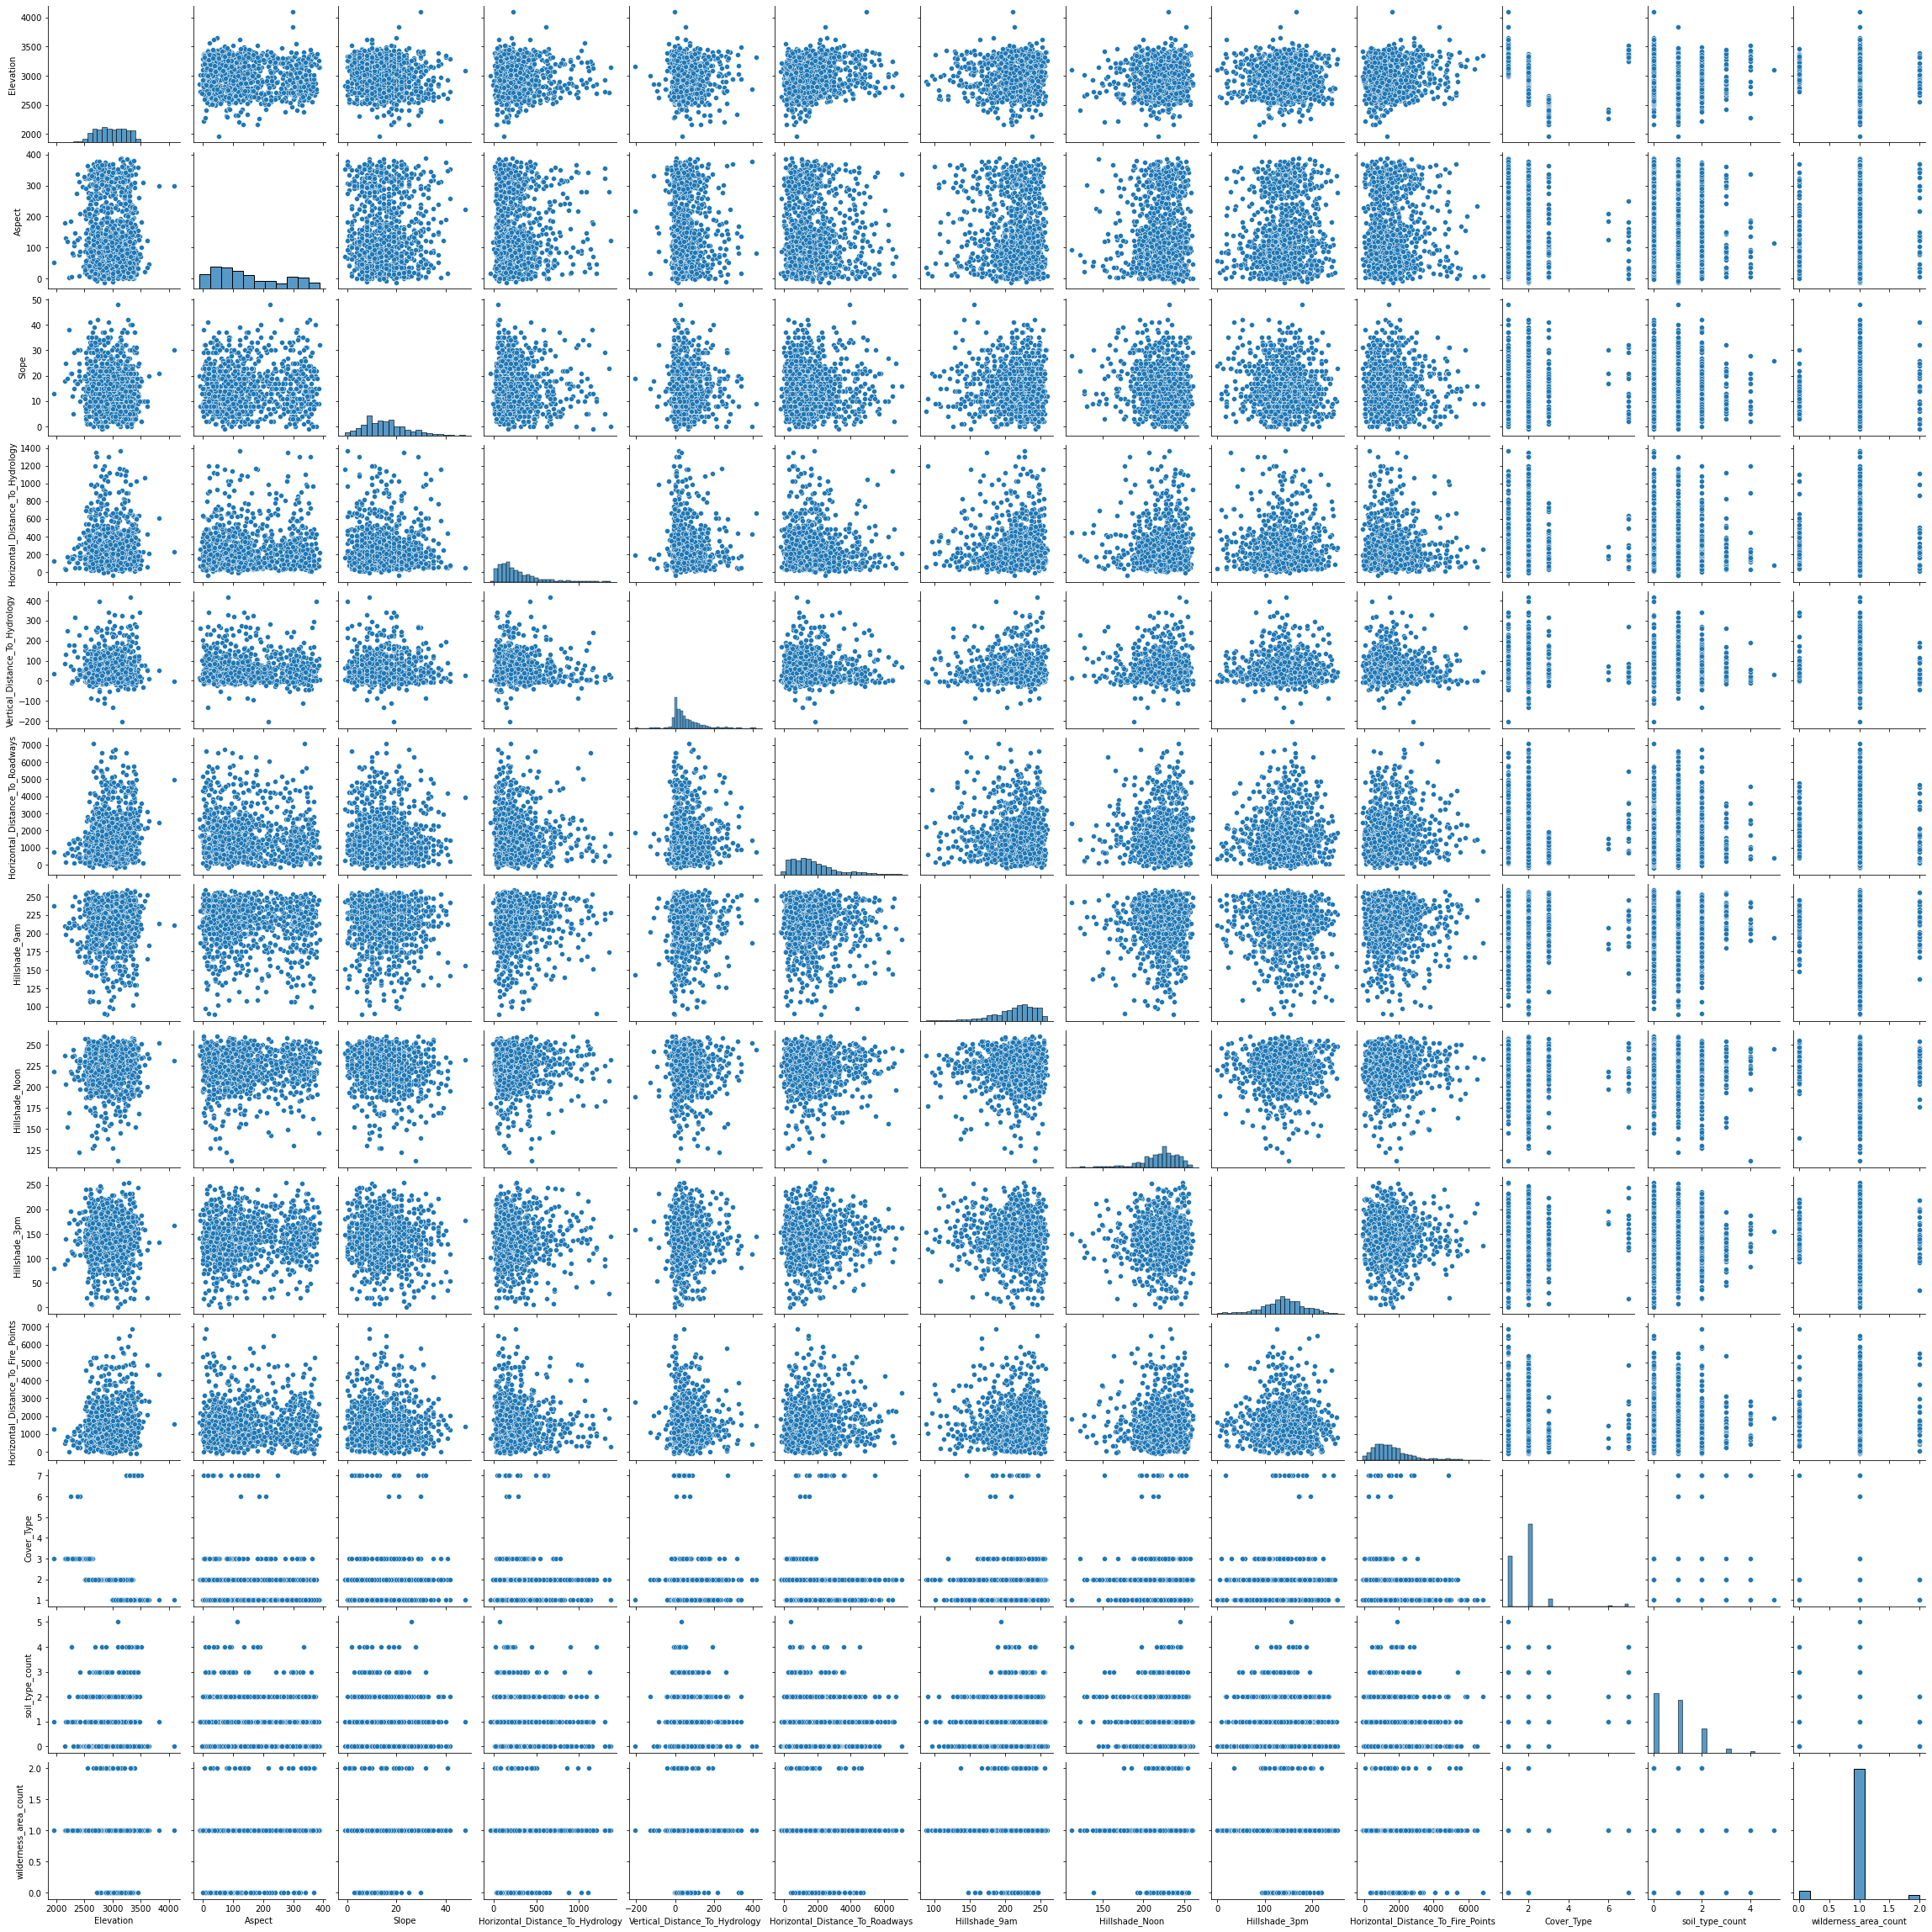

In [20]:
#Pairplot
sns.pairplot(train_df[new_feature])
#--> Considering that there isn't correlation between variables, Pairplot is useless

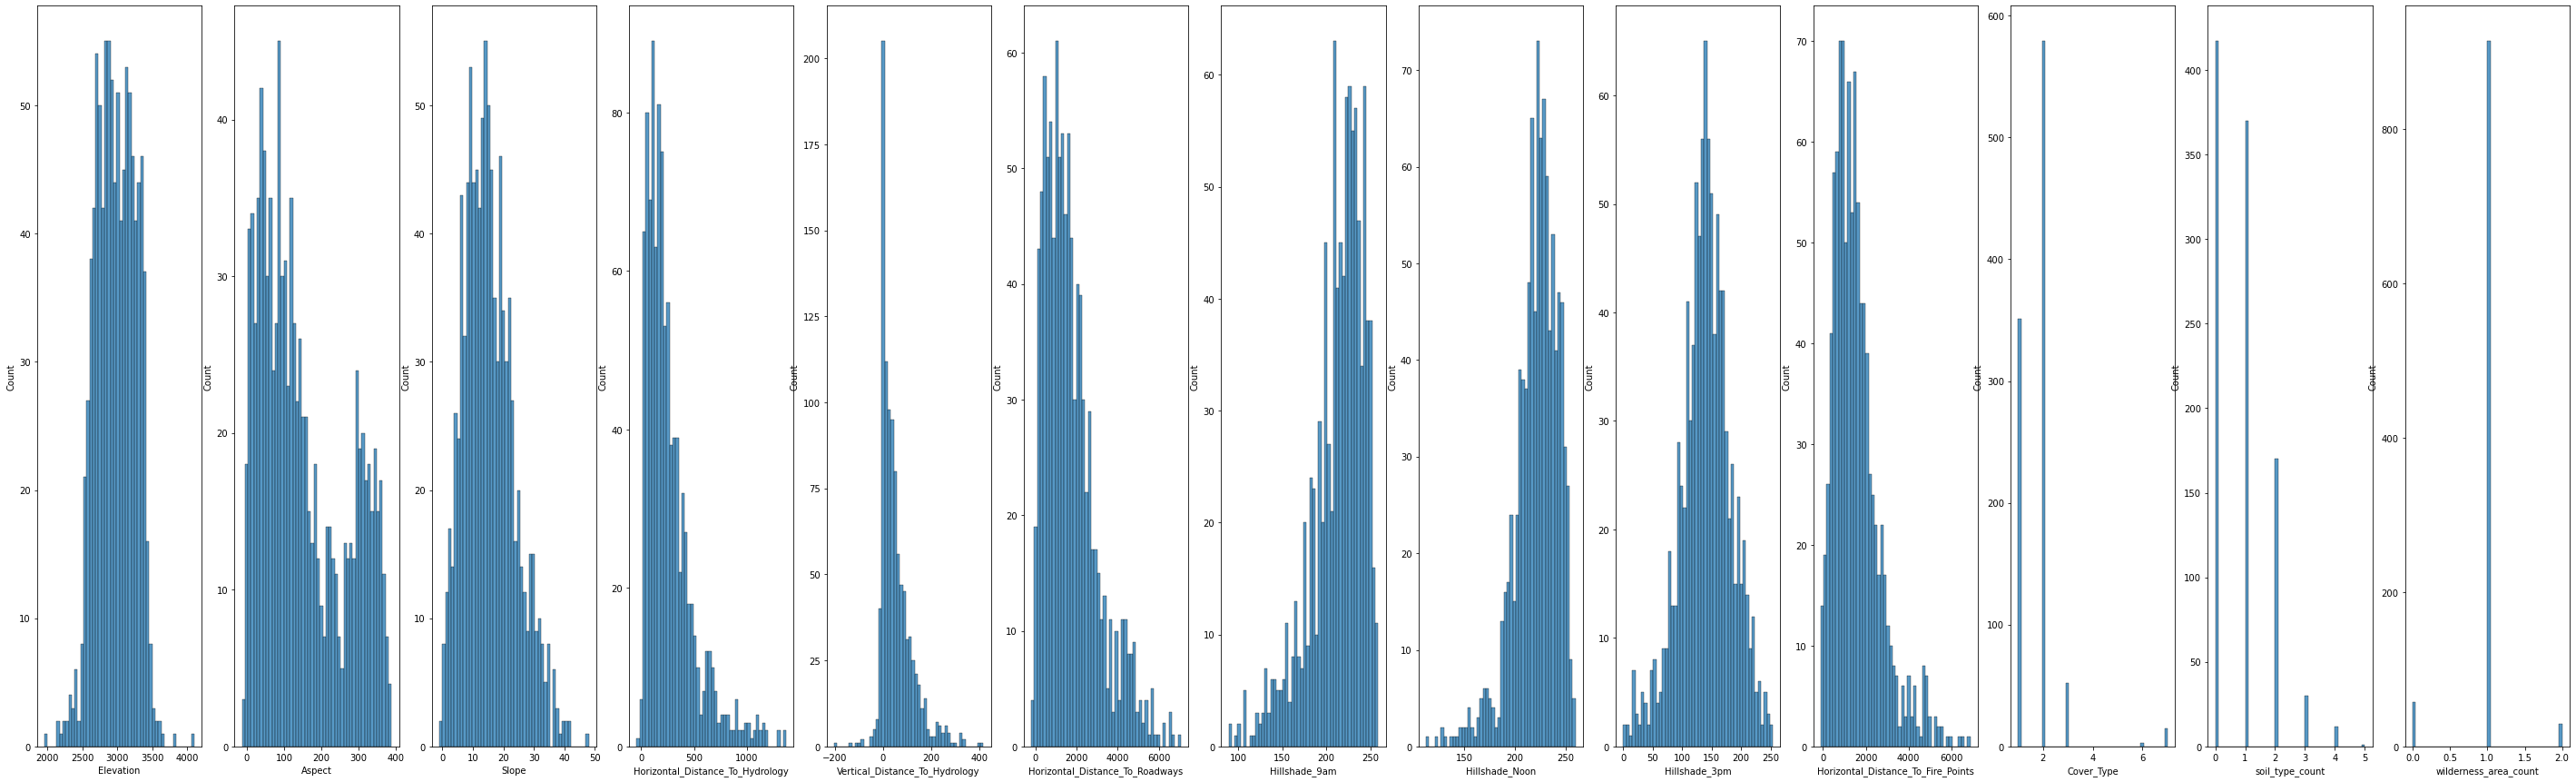

In [21]:
fig, ax = plt.subplots(1, len(new_feature), figsize=(50, 15))
for i, col in enumerate(new_feature):
    sns.histplot(train_df[col], bins=50, ax=ax[i])

<AxesSubplot:ylabel='Count'>

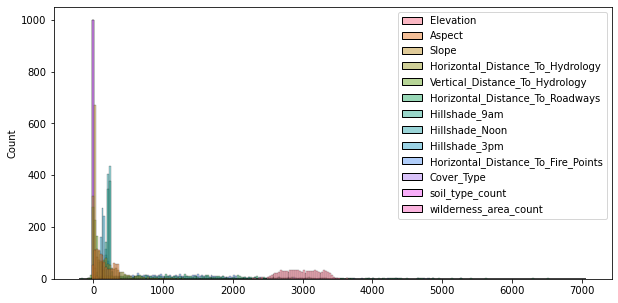

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data =train_df)

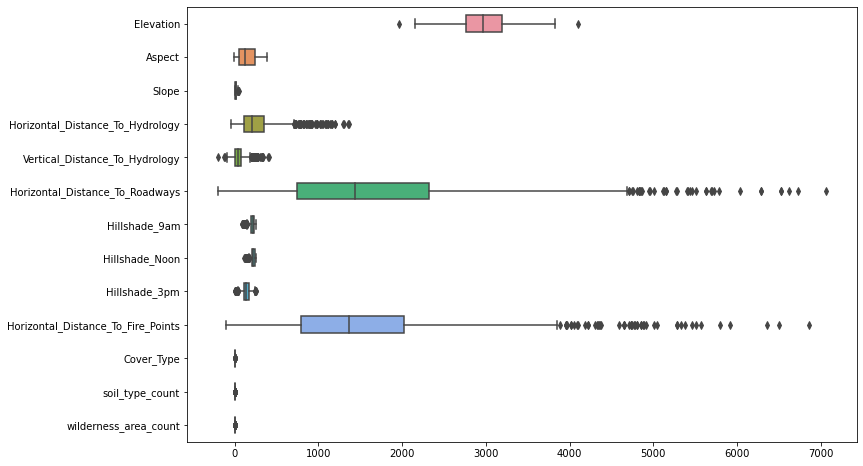

In [23]:
# BoxPlot for Aspect given target class
plt.figure(figsize=(12, 8))
sns.boxplot( data=train_df, orient= 'h',width=0.5);

<AxesSubplot:xlabel='Elevation', ylabel='Cover_Type'>

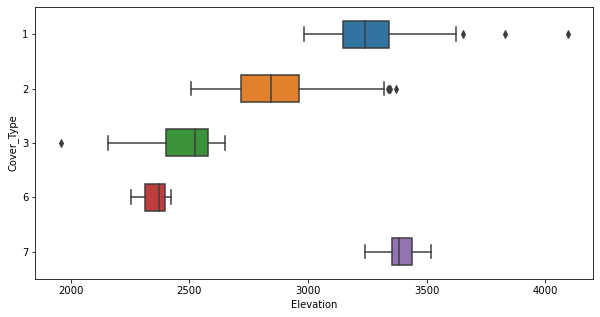

In [24]:
#Box plot Cover type and Elevation
plt.figure(figsize=(10,5))
sns.boxplot(data= train_df,x="Elevation",y="Cover_Type",orient = 'h',width=0.5)

<AxesSubplot:xlabel='Horizontal_Distance_To_Hydrology', ylabel='Cover_Type'>

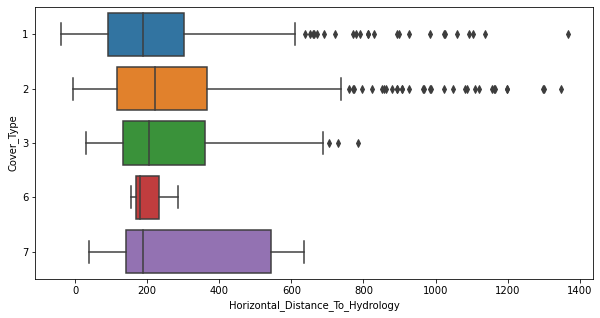

In [25]:
#Boxplot between Horizontal_distance_to_hydrology
plt.figure(figsize=(10,5))
sns.boxplot(data= train_df, x= "Horizontal_Distance_To_Hydrology", y="Cover_Type",orient="h")

<AxesSubplot:xlabel='Aspect', ylabel='Cover_Type'>

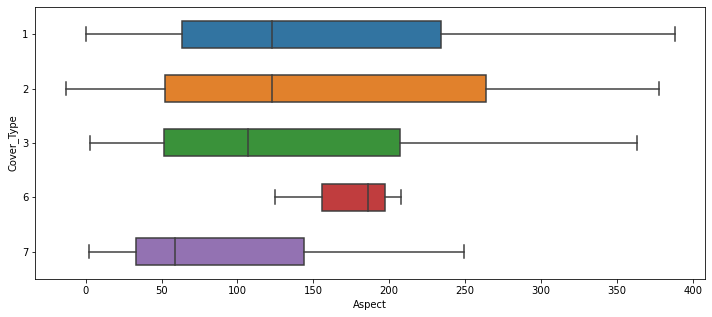

In [26]:
# BoxPlot between Aspect and Cover_type
plt.figure(figsize=(12, 5))
sns.boxplot(x="Aspect", y="Cover_Type", data=train_df,orient="h", width=0.5)


Feature engineering: I've done it in lib.py file;
 more info on this kaggle discussion: https://www.kaggle.com/c/tabular-playground-series-dec-2021/discussion/293612
